# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [99]:
df_room_mates = pd.read_csv('peer_effects_room.csv')\
.assign(person_one = lambda df:df.groupby('room')['person'].transform(lambda df_g:df_g.unique()[0]))\
.assign(person_two = lambda df:df.groupby('room')['person'].transform(lambda df_g:df_g.unique()[1]))\
.assign(person_other = lambda df:df.person_one)

df_room_mates.loc[df_room_mates.person==df_room_mates.person_one,'person_other'] = df_room_mates.loc[df_room_mates.person==df_room_mates.person_one,'person_two']

df_room_mates = df_room_mates\
.loc[:,['room','person','person_other','high_school_GPA','college_GPA']]\
.sort_values(by='room')\
.reset_index(drop=True)

df_room_mates.head(4)

,room,person,person_other,high_school_GPA,college_GPA
0,0,1757,1603,-0.181905,0.566177
1,0,1603,1757,-0.622770,0.540078
2,1,1649,466,0.378918,0.033256
3,1,466,1649,-2.248266,-3.596904
4,2,1929,816,-0.095399,-0.052611


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [100]:
df_tmp         = df_room_mates[['person','high_school_GPA','college_GPA']]
df_tmp.columns = df_tmp.columns + '_other'
df_room_mates  = df_room_mates.merge(df_tmp, on = 'person_other', how = 'left')
df_room_mates.head(4)

,room,person,person_other,high_school_GPA,college_GPA,high_school_GPA_other,college_GPA_other
0,0,1757,1603,-0.181905,0.566177,-0.622770,0.540078
1,0,1603,1757,-0.622770,0.540078,-0.181905,0.566177
2,1,1649,466,0.378918,0.033256,-2.248266,-3.596904
3,1,466,1649,-2.248266,-3.596904,0.378918,0.033256
4,2,1929,816,-0.095399,-0.052611,-0.798128,-1.811919


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0.5, 1.0, 'Correlation between own High School and College GPA')

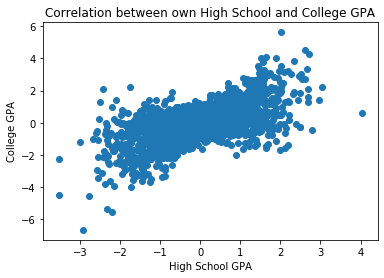

In [110]:
fix,ax = plt.subplots()
plt.scatter(x=df_room_mates.high_school_GPA,y=df_room_mates.college_GPA)
ax.set_xlabel('High School GPA')
ax.set_ylabel('College GPA')
ax.set_title('Correlation between own High School and College GPA')

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     high_school_GPA_other   R-squared (uncentered):                   0.000
Model:                               OLS   Adj. R-squared (uncentered):             -0.000
Method:                    Least Squares   F-statistic:                            0.05536
Date:                   Fri, 15 May 2020   Prob (F-statistic):                       0.814
Time:                           16:45:49   Log-Likelihood:                         -2884.4
No. Observations:                   2000   AIC:                                      5771.
Df Residuals:                       1999   BIC:                                      5776.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
high_school_GPA    -0.0053      0.022     -0.235      0.814      -0.049       0.039
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.290
Skew:                           0.015   Prob(JB):                        0.865
Kurtosis:                       2.949   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

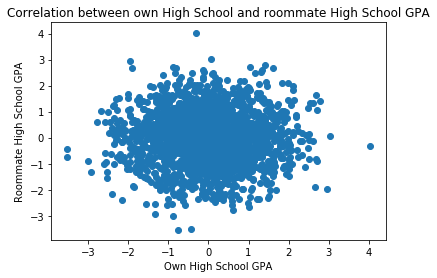

In [120]:
fix,ax = plt.subplots()
X = df_room_mates.high_school_GPA
Y = df_room_mates.high_school_GPA_other
plt.scatter(x=X,y=Y)
ax.set_xlabel('Own High School GPA')
ax.set_ylabel('Roommate High School GPA')
ax.set_title('Correlation between own High School and roommate High School GPA')

## Run OLS regression
model   = sm.OLS(Y,X)
results = model.fit()
results.summary()

### Answer to ex 12.1.4

*The plot looks very much what we would expect if X and Y are indeed independent of each other. That is, we do not see any clear positive or negative correlation between the two. The coefficient result from the linear regression support this, as the coefficient is insignificant. If the assignment of students to college rooms are indeed random, we should not see any systematic correlation between students pre-college academic performance. Thus, the results from this exercise supports the fact that the roommates are indeed put together randomly (or at least randomly in the view of their pre-college academic performance).*

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            college_GPA   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              673.0
Date:                Fri, 15 May 2020   Prob (F-statistic):                   3.58e-224
Time:                        16:54:15   Log-Likelihood:                         -2586.7
No. Observations:                2000   AIC:                                      5177.
Df Residuals:                    1998   BIC:                                      5189.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
high_school_GPA           0.7065      0.019     36.649      0.000       0.669       0.744
high_school_GPA_other     0.0362      0.019      1.880      0.060      -0.002       0.074
==============================================================================
Omnibus:                       77.511   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.691
Skew:                          -0.117   Prob(JB):                     6.53e-47
Kurtosis:                       4.580   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

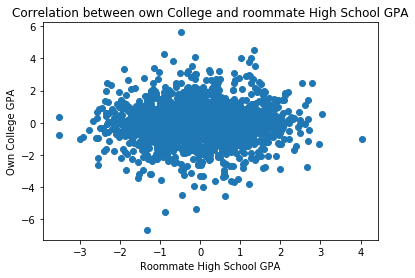

In [123]:
fix,ax = plt.subplots()
Y = df_room_mates.college_GPA
X = df_room_mates.high_school_GPA_other

plt.scatter(x=X,y=Y)
ax.set_ylabel('Own College GPA')
ax.set_xlabel('Roommate High School GPA')
ax.set_title('Correlation between own College and roommate High School GPA')

## Run OLS regression
Y_reg   = df_room_mates['college_GPA']
X_reg   = df_room_mates[['high_school_GPA','high_school_GPA_other']]
model   = sm.OLS(Y_reg,X_reg)
results = model.fit()
results.summary()

### Answer to ex 12.1.5

*The regression results show that own High School GPA is significantly positively correlated with own College GPA. The roommates' high school GPA has an estimated positive correlation, but is insignificant.*

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [124]:
## Run OLS regression
Y_reg   = df_room_mates['college_GPA']
X_reg   = df_room_mates[['high_school_GPA','high_school_GPA_other','college_GPA_other']]
model   = sm.OLS(Y_reg,X_reg)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            college_GPA   R-squared (uncentered):                   0.406
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              454.9
Date:                Fri, 15 May 2020   Prob (F-statistic):                   3.23e-225
Time:                        16:56:55   Log-Likelihood:                         -2580.9
No. Observations:                2000   AIC:                                      5168.
Df Residuals:                    1997   BIC:                                      5185.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
high_school_GPA           0.7038      0.019     36.571      0.000       0.666       0.741
high_school_GPA_other    -0.0175      0.025     -0.703      0.482      -0.066       0.031
college_GPA_other         0.0760      0.022      3.407      0.001       0.032       0.120
==============================================================================
Omnibus:                       79.391   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.549
Skew:                          -0.117   Prob(JB):                     7.79e-49
Kurtosis:                       4.614   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Answer to ex 12.1.6

*The regression results support the hypothesis of endogenous effects. We can see that own college GPA and roommates college GPA is significantly positively correlated. That is, if a student does well in college, so does his roomate (or visa versa). Interestingly, the coefficient on roommate's high school GPA becomes even more insignificant compared to our previous regression. This suggests, that the potential positive exogenous effect was infact driven by an endogenous effect. That is, the previous regression had an omitted variable issue that upward biased the coefficient estimate of the exogenous effect.*

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

*The authors argue that they cannot avoid selection into schools by only comparing the within-school changes of mean-group-characteristics to labor outcome 20 years later. That is, they do not compare the between-school differences. Their identification strategy requires that the sorting effect between schools are constant over time. Also, they choose to consider cohorts instead of classes, as they expect to be too much sorting between classes within a cohort at a school.*

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

*Lets take a step back and consider the three social effects mentioned during the lecture. The Kraka authors only consider exogenous/contextual effects in their linear-means-model. Hence, their results could be a spurious results driven by endogenous or correlated effects. Personally, I do not buy their identification premise that sorting does not occur between same-school-different-year cohorts. It's my experience that parents do re-allocate their children if a cohort at a specific school is worse than what it normally is. I would not be surprised if the parents with lots of ressources were the first to re-allocate their children in such cases. If this is the case, the remaining children would be those who are relatively less-well. These children could be less succesful in their working career for many other reasons - for example that their parents had less ressources. The link to Hoxby is broken.*

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

*One may consider quasi-random experiments from re-drawings of the school district borders. Obviously one would have to control for the facters which determine where the school district border is located.*